# 물체 탐지(Object detection)


# YOLO3로 물체 탐지

## YOLOv3 다운로드


In [1]:
# 프로젝트 다운로드
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet


/content
Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 20.86 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.


In [2]:
# 빌드
%cd /content/darknet
!make

# 빌드된 실행파일 확인
!ls -al darknet

# 빌드 확인
!./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

## 학습된 모델 파일 다운로드

In [3]:
%cd /content/darknet
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2020-09-22 23:16:15--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-09-22 23:16:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   468KB/s    in 9m 6s   

2020-09-22 23:25:22 (444 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2020-09-22 23:25:22--
Total wall clock time: 9m 7s
Downloaded: 1 files, 237M in 9m 6s (444 KB/s)


## darknet으로 물체 탐지 실행

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

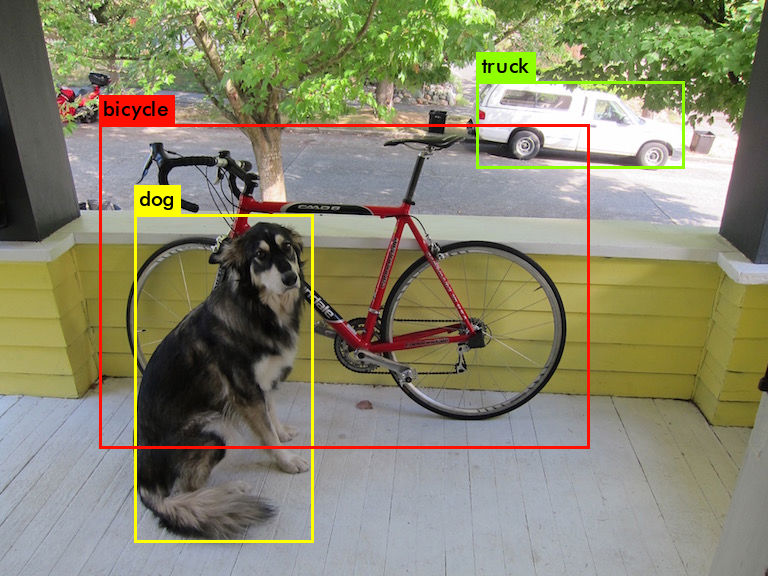

In [4]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')

# Python Keras로 물체 YOLO 탐지 실행

## Keras 변환 코드 다운로드


In [5]:
# 다운로드
%cd /content
!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3
  
# 다운로드된 디렉토리로 이동
%cd keras-yolo3

# 내용 확인
!pwd
!ls -al  

/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 2.60 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/keras-yolo3
/content/keras-yolo3
total 124
drwxr-xr-x 6 root root  4096 Sep 22 23:25 .
drwxr-xr-x 1 root root  4096 Sep 22 23:25 ..
-rw-r--r-- 1 root root  1323 Sep 22 23:25 coco_annotation.py
-rw-r--r-- 1 root root 10093 Sep 22 23:25 convert.py
-rw-r--r-- 1 root root  5707 Sep 22 23:25 darknet53.cfg
drwxr-xr-x 2 root root  4096 Sep 22 23:25 font
drwxr-xr-x 8 root root  4096 Sep 22 23:25 .git
-rw-r--r-- 1 root root  1201 Sep 22 23:25 .gitignore
-rw-r--r-- 1 root root  3482 Sep 22 23:25 kmeans.py
-rw-r--r-- 1 root root  1064 Sep 22 23:25 LICENSE
drwxr-xr-x 2 root root  4096 Sep 22 23:25 model_data
-rw-r--r-- 1 root root  4077 Sep 22 23:25 README.md
-rw-r--r-- 1 root root 10686 Sep 22 23:25 train_bottleneck.py
-rw-r--r-- 1 root root  8

## YOLO3 모델 파일 카피


In [6]:
%cd /content/keras-yolo3

!cp /content/darknet/yolov3.weights ./

!ls -al yolov3.weights

/content/keras-yolo3
-rw-r--r-- 1 root root 248007048 Sep 22 23:25 yolov3.weights


## 모델 파일 변환

YOLO3 자체는 C/C++로 구현된 DarkNet 프레임웤으로 구현되어 있다. 

공개된 모델은 DarkNet의 포멧이다. 이를 Keras에서 사용할 수 있는 h5 포멧으로 변환한다.


- convert.py : 변환 실행 파일

- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일

- yolov3.weight : Darknet으로 학습된 모델 파일


실행 결과로 다음의 h5 파일로 변환된다.
 
- model/yolov3.h5 : 변환된 모델 파일


In [7]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [8]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

## 모델구조 보기

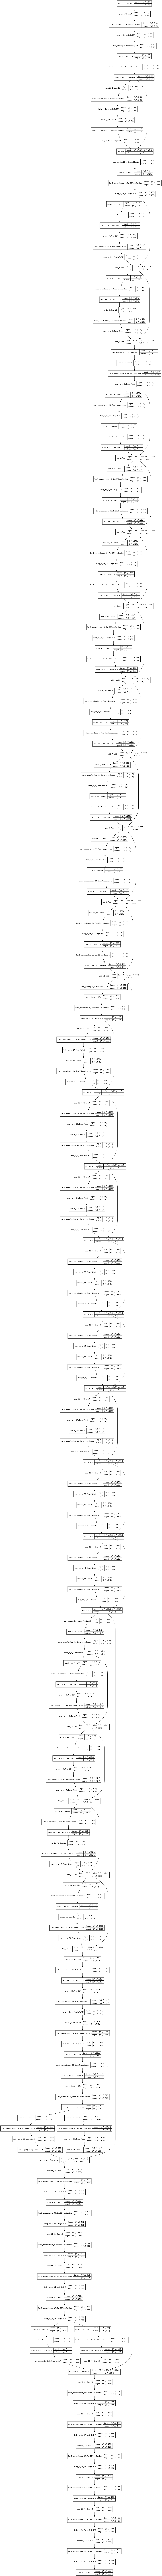

In [9]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model

# 모델 파일 로딩
model = load_model('yolov3.h5')

# 구조를 이미지로 저장
plot_model(model, show_shapes=True, to_file='yolo3_structure.png')

from IPython.display import Image
Image('yolo3_structure.png')



## 탐지 대상 이미지 다운로드


--2020-09-22 23:26:07--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.96
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.96|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K  --.-KB/s    in 0.02s   

2020-09-22 23:26:08 (3.98 MB/s) - ‘street_view.jpg’ saved [89406/89406]



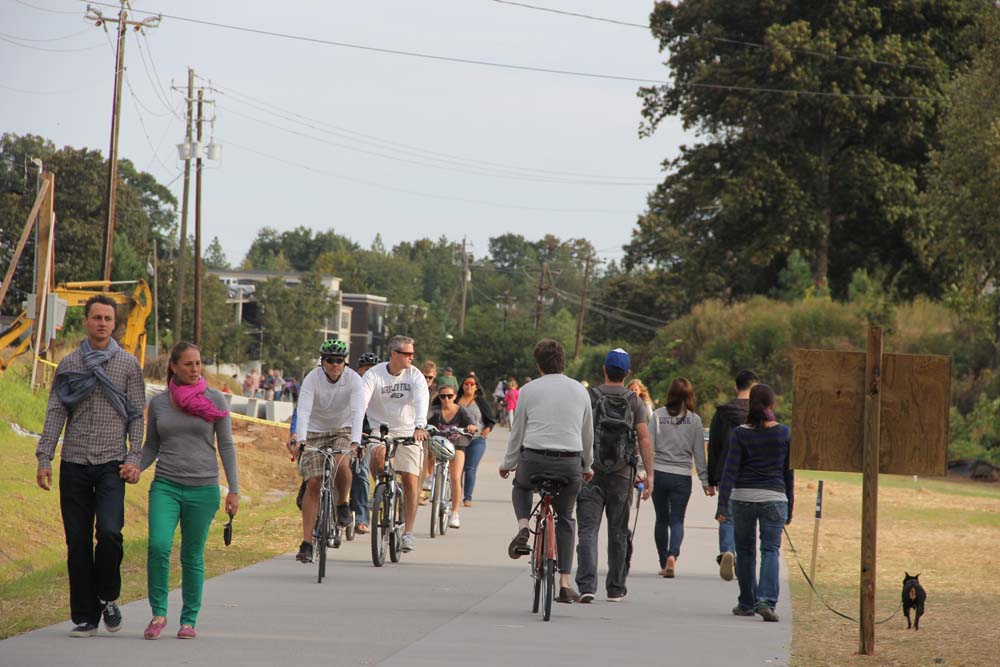

In [10]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

## 물체 탐지 실행

다음의 파일이 필요하다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


In [11]:
!cat model_data/coco_classes.txt

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [2]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)

  # 실행 결과 표시
  display(result_image)


ModuleNotFoundError: ignored

In [1]:
do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')



NameError: ignored

# 커스텀 데이터 적용


## 커스텀 데이터 업로드

In [ ]:
%cd /content/keras-yolo3

from google.colab import files

# 파일이름 dental_image_in_voc_format.tar.gz
uploaded = files.upload()

!ls -al 

In [ ]:
# 압축 풀기
!tar xvfz dental_image_in_voc_format.tar.gz

# 확인
!ls -al dental_image_in_voc_format.tar.gz

In [ ]:
# 압출 풀린 파일들 확인
!ls -al dental_image_in_voc_format

## VOC 포멧의 레이블링 데이터를  darknet 포멧으로 변경

In [ ]:
# copy and modified from voc_annotation.py

import xml.etree.ElementTree as ET
from os import getcwd
import glob


def convert_voc_2_darknet(data_folder_name, converted_file_name):
  
  def load_classes():
      with open('%s/classes.txt'%(data_folder_name)) as f:
          classes = f.read().splitlines()

      return classes

  def convert_annotation(image_id, converted_file):
      tree=ET.parse('%s/Annotations/%s.xml'%(data_folder_name, image_id))
      root = tree.getroot()

      for obj in root.iter('object'):
          difficult = obj.find('difficult').text
          cls = obj.find('name').text
          if cls not in classes or int(difficult)==1:
              continue
          cls_id = classes.index(cls)
          xmlbox = obj.find('bndbox')
          b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
          converted_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

  # classes = ['tooth', 'decayed', 'cured']
  classes = load_classes()


  # image_ids = ['101', '102', ... '305']
  image_ids = [ f.replace(".xml", "").replace("%s/Annotations/"%(data_folder_name), "") for f in glob.glob('%s/Annotations/*.xml'%(DATA_FOLDER_NAME))]


  wd = getcwd()


  converted_file = open(converted_file_name, 'w')
  for image_id in image_ids:
      converted_file.write('%s/JPEGImages/%s.jpg'%(data_folder_name, image_id))
      convert_annotation(image_id, converted_file)
      converted_file.write('\n')
  converted_file.close()


DATA_FOLDER_NAME = "dental_image_in_voc_format"
CONVERTED_FILE_NAME = "train_all.txt"

convert_voc_2_darknet(DATA_FOLDER_NAME, CONVERTED_FILE_NAME)


In [ ]:
!ls -al train_all.txt
!head -10 train_all.txt

In [ ]:
# copy and modified from train.py

"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
#    annotation_path = 'train.txt'
    annotation_path = 'train_all.txt' # Modified
    log_dir = 'logs/000/'
#    classes_path = 'model_data/voc_classes.txt' # Modified    
    classes_path = 'dental_image_in_voc_format/classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
            freeze_body=2, weights_path='yolov3_tiny.h5') # Modified
    else:
        model = create_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/yolo_weights.h5')
            freeze_body=2, weights_path='yolov3.h5') # Modified

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=50,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

_main()



In [ ]:
!ls -al logs/000

## 물체 탐지 실행


In [ ]:
%cd "/content/keras-yolo3"

do_object_detection('dental_image_in_voc_format/JPEGImages/301.jpg', 'logs/000/ep048-loss160.464-val_loss145.007.h5', 'dental_image_in_voc_format/classes.txt')

# SSD로 물체 탐지


## Keras 코드 다운로드

In [ ]:
# 다운로드
%cd /content
!git clone https://github.com/pierluigiferrari/ssd_keras
  
# 다운로드된 디렉토리로 이동
%cd ssd_keras

# 내용 확인
!pwd
!ls -al  

## 모델 정의와 모델 로딩


이미 학습된 SSD 모델 파일 VGG_coco_SSD_300x300_iter_400000.h5은

다음 페이지의 'COCO[1]: SSD300*'에 걸린 링크로 다운 받는다.

https://github.com/pierluigiferrari/ssd_keras#download-the-original-trained-model-weights

files.upload()로 업로드하면 1시간 이상 시간이 걸린다.


대신 dropbox에 임시로 올려둔 파일에서 다운로드 한다. wget으로 다운로드 받는다.




In [ ]:
%cd /content/ssd_keras

!wget -O VGG_coco_SSD_300x300.h5 https://www.dropbox.com/s/z7sf5c8wx39fo9n/VGG_coco_SSD_300x300.h5?dl=1
  
!ls -al

In [ ]:
INTENTIONAL_ERROR

%cd /content/ssd_keras

from google.colab import files

# 파일이름 VGG_coco_SSD_300x300.h5
uploaded = files.upload()

!ls -al 

In [ ]:
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline

In [ ]:
# Set the image size.
img_height = 300
img_width = 300

In [ ]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model = ssd_300(image_size=(img_height, img_width, 3),
                n_classes=20,
                mode='inference',
                l2_regularization=0.0005,
                scales=[0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05], # The scales for MS COCO are [0.07, 0.15, 0.33, 0.51, 0.69, 0.87, 1.05]
                aspect_ratios_per_layer=[[1.0, 2.0, 0.5],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                         [1.0, 2.0, 0.5],
                                         [1.0, 2.0, 0.5]],
                two_boxes_for_ar1=True,
                steps=[8, 16, 32, 64, 100, 300],
                offsets=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                clip_boxes=False,
                variances=[0.1, 0.1, 0.2, 0.2],
                normalize_coords=True,
                subtract_mean=[123, 117, 104],
                swap_channels=[2, 1, 0],
                confidence_thresh=0.5,
                iou_threshold=0.45,
                top_k=200,
                nms_max_output_size=400)

# 2: Load the trained weights into the model.

# TODO: Set the path of the trained weights.
#weights_path = 'path/to/trained/weights/VGG_VOC0712_SSD_300x300_iter_120000.h5'
weights_path = 'VGG_coco_SSD_300x300.h5'


model.load_weights(weights_path, by_name=True)

# 3: Compile the model so that Keras won't complain the next time you load it.

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=adam, loss=ssd_loss.compute_loss)

## 실행

아래의 코드는 https://github.com/pierluigiferrari/ssd_keras/blob/master/ssd300_inference.ipynb 의 코드를 그대로 카피해 왔다.

In [ ]:
orig_images = [] # Store the images here.
input_images = [] # Store resized versions of the images here.

# We'll only load one image in this example.
img_path = 'examples/fish_bike.jpg'

orig_images.append(imread(img_path))
img = image.load_img(img_path, target_size=(img_height, img_width))
img = image.img_to_array(img) 
input_images.append(img)
input_images = np.array(input_images)

In [ ]:
# 모델 호출
y_pred = model.predict(input_images)

In [ ]:
# 특정값 이상만 필터링
confidence_threshold = 0.5

y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_thresh[0])

In [ ]:
# Display the image and draw the predicted boxes onto it.

# Set the colors for the bounding boxes
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

plt.figure(figsize=(20,12))
plt.imshow(orig_images[0])

current_axis = plt.gca()

for box in y_pred_thresh[0]:
    # Transform the predicted bounding boxes for the 300x300 image to the original image dimensions.
    xmin = box[2] * orig_images[0].shape[1] / img_width
    ymin = box[3] * orig_images[0].shape[0] / img_height
    xmax = box[4] * orig_images[0].shape[1] / img_width
    ymax = box[5] * orig_images[0].shape[0] / img_height
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})